# Clustering

- Different Clustering Algorithms
- Data Scaling
- PCA for Visualization
- Visualize Cluster Silhouettes
- Optimal numbers of clusters
- Class Purity


Dataset: Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image in the 3-dimensional space

Author: Enrico Lauckner ([github.com/elauckne](github.com/elauckne))

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.style.use('ggplot')

## Load Data

In [2]:
from sklearn import datasets

In [3]:
bc = datasets.load_breast_cancer()

In [4]:
bc.target_names

array(['malignant', 'benign'], dtype='<U9')

In [5]:
bc.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
class_0, class_1 = bc.target_names[0], bc.target_names[1]
feat_cols = bc.feature_names
ids = np.arange(569)+1
y = bc.target
x = bc.data

In [7]:
print(ids.shape)
print(y.shape)
print(x.shape)

(569,)
(569,)
(569, 30)


## Scale Data

In [8]:
from sklearn.preprocessing import QuantileTransformer

In [9]:
qt = QuantileTransformer(output_distribution = 'uniform')
qt.fit(x)
x_qt = qt.transform(x)
x_qt.shape

(569, 30)

## PCA

Dimensional Reduction for 2D-Plotting

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components = 2).fit(x_qt)

In [12]:
pd.DataFrame(pca.components_.round(2), columns = feat_cols, index = ['pca_x1', 'pca_x2']).T

,pca_x1,pca_x2
mean radius,0.21,-0.25
mean texture,0.11,-0.05
mean perimeter,0.22,-0.23
mean area,0.21,-0.25
mean smoothness,0.14,0.20
mean compactness,0.24,0.14
mean concavity,0.25,0.05
mean concave points,0.25,-0.02
mean symmetry,0.13,0.19
mean fractal dimension,0.05,0.36


In [13]:
pca_2d = pca.transform(x_qt)
pca_2d.shape

(569, 2)

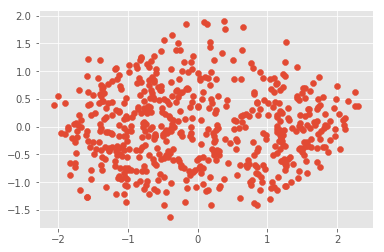

In [14]:
plt.figure(figsize=(6,4))
plt.scatter(pca_2d[:,0], pca_2d[:,1])
plt.show()

Add actual classes

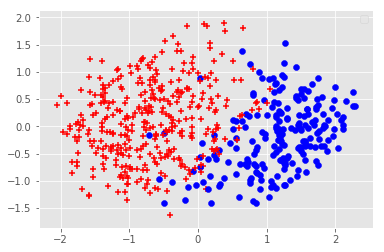

In [15]:
for i in range(pca_2d.shape[0]):
    if y[i] == 1:
        p1 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c = 'r', marker = '+')
    elif(y[i] == 0):
        p2 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c = 'b', marker = 'o')
plt.legend(['p1', 'p2'], [class_0, class_1])
plt.show()

## Evaluation

#### Silhouette Score

In [16]:
from sklearn.metrics import silhouette_samples, silhouette_score

#### Optimal number of clusters k

In [17]:
def val_cluster_count(model, candidates):
    result_dict = {}

    for n_clusters in candidates:

        clusterer = model(n_clusters = n_clusters)
        cluster_labels = clusterer.fit_predict(x_qt)

        silhouette_avg = silhouette_score(x_qt, cluster_labels)

        result_dict[str(n_clusters)] = round(silhouette_avg,2)

    result = pd.DataFrame([result_dict.keys(), result_dict.values()], index = ['Clusters', 'Silhouette']).T
    
    return result.sort_values('Silhouette', ascending = False)

#### Class Purity

In [18]:
def class_purity(model):
    vc = pd.Series(pd.Series(model.labels_).value_counts()) 
    cc = len(np.unique(model.labels_))
    
    class_0_list = []
    class_1_list = []

    for i in range(cc):
        c0 = round(sum(pd.Series(y[model.labels_ == vc.index[i]]) == 0) / vc[vc.index[i]], 2)
        c1 = round(sum(pd.Series(y[model.labels_ == vc.index[i]]) == 1) / vc[vc.index[i]], 2)

        class_0_list.append(c0)
        class_1_list.append(c1)
        
    cluster_purity = pd.DataFrame(vc).reset_index()
    cluster_purity.columns = ['Cluster', 'Size']

    cluster_purity[class_0] = pd.Series(class_0_list)
    cluster_purity[class_1] = pd.Series(class_1_list)
    
    return cluster_purity[:10]

## K-Means

In [19]:
from sklearn.cluster import MiniBatchKMeans

### Determine Number of Clusters

In [20]:
val_cluster_count(MiniBatchKMeans, range(2,11))

,Clusters,Silhouette
0,2,0.3
1,3,0.22
2,4,0.18
3,5,0.16
4,6,0.14
5,7,0.13
8,10,0.13
6,8,0.12
7,9,0.12


In [21]:
val_cluster_count(MiniBatchKMeans, range(2,103, 10))

,Clusters,Silhouette
0,2,0.3
1,12,0.11
2,22,0.1
3,32,0.1
4,42,0.09
5,52,0.09
6,62,0.09
10,102,0.09
7,72,0.08
8,82,0.08


### 2 Clusters

In [22]:
km = MiniBatchKMeans(n_clusters = 2, random_state = 123)
km.fit(x_qt)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=2,
        n_init=3, random_state=123, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [23]:
class_purity(km)

,Cluster,Size,malignant,benign
0,0,322,0.04,0.96
1,1,247,0.80,0.20


## Agglomerative

In [24]:
from sklearn.cluster import AgglomerativeClustering

### Determine Number of Clusters

In [25]:
val_cluster_count(AgglomerativeClustering, range(2,11))

,Clusters,Silhouette
0,2,0.29
1,3,0.22
2,4,0.17
3,5,0.11
4,6,0.11
5,7,0.1
6,8,0.1
7,9,0.09
8,10,0.09


In [26]:
val_cluster_count(AgglomerativeClustering, range(2,103, 10))

,Clusters,Silhouette
0,2,0.29
9,92,0.12
10,102,0.12
7,72,0.11
8,82,0.11
5,52,0.1
6,62,0.1
1,12,0.09
3,32,0.09
4,42,0.09


### N Clusters

In [27]:
ac = AgglomerativeClustering(n_clusters = 2)
ac.fit(x_qt)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=2,
            pooling_func='deprecated')

In [28]:
class_purity(ac)

,Cluster,Size,malignant,benign
0,0,366,0.08,0.92
1,1,203,0.90,0.10


## Mean Shift

In [29]:
from sklearn.cluster import MeanShift

In [30]:
ms = MeanShift(cluster_all = False, min_bin_freq = 100, n_jobs = 3)
ms.fit(x_qt)

print(str(len(np.unique(ms.labels_))) + ' clusters')

2 clusters


In [31]:
class_purity(ms)

,Cluster,Size,malignant,benign
0,0,369,0.13,0.87
1,-1,200,0.82,0.18


## DB-Scan

In [32]:
from sklearn.cluster import DBSCAN

In [33]:
db = DBSCAN(n_jobs = 3)
db.fit(x_qt)

print(str(len(np.unique(db.labels_))) + ' clusters')

1 clusters


In [34]:
class_purity(db)

,Cluster,Size,malignant,benign
0,-1,569,0.37,0.63


### Spectral Clustering 

In [35]:
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import SpectralClustering

In [36]:
sc = SpectralClustering(n_clusters = 2, n_jobs = 3)
sc.fit(x_qt)

print(str(len(np.unique(sc.labels_))) + ' clusters')

2 clusters


In [37]:
class_purity(sc)

,Cluster,Size,malignant,benign
0,0,363,0.06,0.94
1,1,206,0.92,0.08


### AffinityPropagation

In [38]:
ap = AffinityPropagation()
ap.fit(x_qt)

print(str(len(np.unique(ap.labels_))) + ' clusters')

34 clusters


In [39]:
class_purity(ap)

,Cluster,Size,malignant,benign
0,22,34,0.00,1.00
1,28,30,1.00,0.00
2,6,27,0.07,0.93
3,29,25,0.04,0.96
4,0,23,1.00,0.00
5,10,23,0.00,1.00
6,15,22,0.00,1.00
7,25,22,1.00,0.00
8,13,21,0.90,0.10
9,9,19,0.89,0.11


## Visualize Cluster Silhouettes

In [40]:
def visualize_cluster_silhouettes(model, x, range_n_clusters, random_state=666):

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = model(n_clusters=n_clusters, random_state=random_state)
        cluster_labels = clusterer.fit_predict(x)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(x, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(x, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(x[:, 0], x[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.2975659568090595
For n_clusters = 4 The average silhouette_score is : 0.1899172636045624


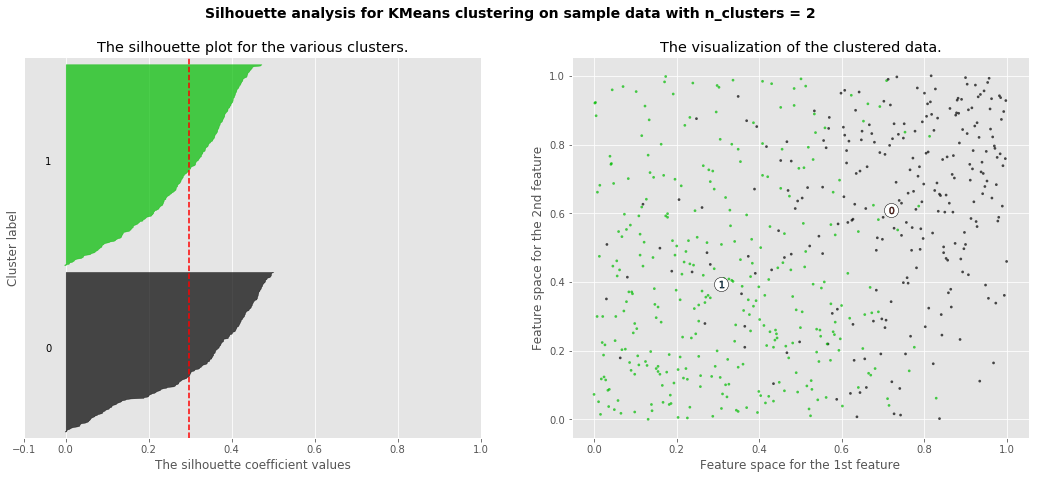

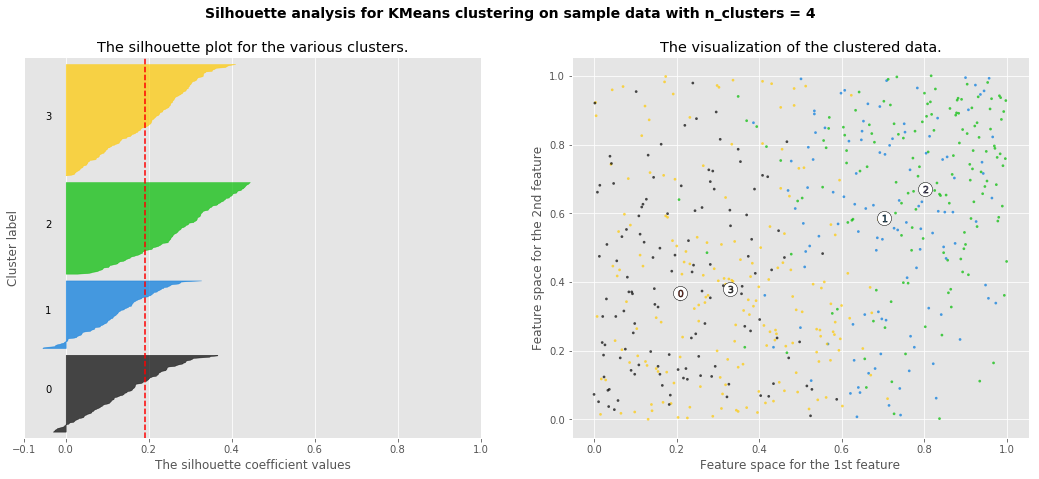

In [41]:
visualize_cluster_silhouettes(model=MiniBatchKMeans, x=x_qt, range_n_clusters=[2,4])

----

# sklearn Example with Artificial Data

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437


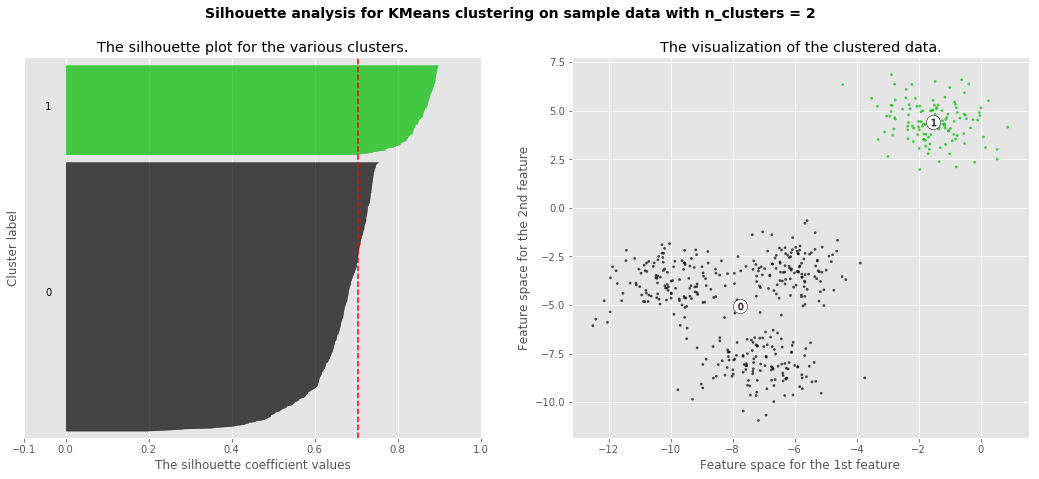

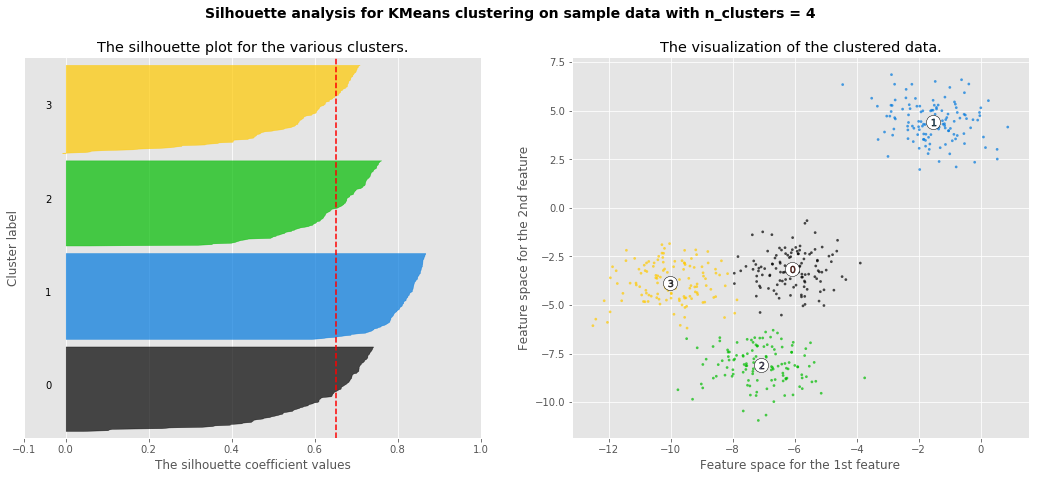

In [42]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 4]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()